# Hausarbeit im Modul „Data Science und Machine Learning“ WS22/23 - Teil 3
## The shopping data set

Tasks
1. Cluster the existing data based on appropriate procedures. Justify how you would cluster the data set based on the results.
2. Describe the clusters found based on the characteristics of the attributes of the customers and the cluster size.
3. What recommendation could you give the marketing department based on your analysis?

Marketing
E.g., Companies have access to a large number of measurements

− median household income,
− occupation,
− distance from the nearest urban area,
− technology affinity, ….

Clustering helps marketers discover distinct groups in their customer bases and use this knowledge to develop targeted marketingprograms

Choosing the number of clusters requires a delicate balance.

Setting the k to be very large will improve the homogeneity of the clusters.

At the same time, it risks overfitting the data.

Guessing the number of clusters

Ideally, you will have some a priori knowledge (that is, a prior belief) about the true groupings, and you can begin applyingk-Means using this information.

We will deal with this issue in a later chapter (Finding the right number of clusters)

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [68]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans


# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "06_Clustering_Images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Tasks 1 - Cluster the existing data based on appropriate procedures. Justify how you would cluster the data set based on the results.

Going for K-means clustering
General procedure/approach
1. Data Preparation
    1. removing any missing values
    1. Removing outliers 
1. Feature selection
1. Feature-Engineering 
1. Daten skalieren
1. Clustering k-means

## 1.1 Data preparation

In [21]:
##Import data
customer1 = pd.read_csv("https://raw.githubusercontent.com/Ph1lippK/VAWI/master/Data/03_Retail_Clustering.csv", sep = ';')

customer1.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Kid_home,Teen_home,Registration_date,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1957,Graduation,Single,58138.0,0,0,04.09.2020,58,0,635,88,546,172,88,88,3,8,10,4
1,1954,Graduation,Single,46344.0,1,1,08.03.2022,38,0,11,1,6,2,1,6,2,1,1,2
2,1965,Graduation,Together,71613.0,0,0,21.08.2021,26,0,426,49,127,111,21,42,1,8,2,10
3,1984,Graduation,Together,26646.0,1,0,10.02.2022,26,0,11,4,20,10,3,5,2,2,0,4
4,1981,PhD,Married,58293.0,1,0,19.01.2022,94,0,173,43,118,46,27,15,5,5,3,6


In [22]:
customer1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Estimated_Income     2216 non-null   float64
 4   Kid_home             2240 non-null   int64  
 5   Teen_home            2240 non-null   int64  
 6   Registration_date    2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   Exist_Complain       2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [23]:
##Check for missing values
#print(customer1.isna().sum()) # Check the number of missing values in each column
##dropping missing values
customer_clean = customer1.dropna()
print(customer_clean.isna().sum()) # Check the number of missing values in each column

Year_Birth             0
Education              0
Marital_Status         0
Estimated_Income       0
Kid_home               0
Teen_home              0
Registration_date      0
Recency                0
Exist_Complain         0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
dtype: int64


In [24]:
#customer_clean.head()
customer_clean.describe()

,Year_Birth,Estimated_Income,Kid_home,Teen_home,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1968.820397,52247.251354,0.441787,0.505415,49.012635,0.009477,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993
std,11.985554,25173.076661,0.536896,0.544181,28.948352,0.096907,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000


In [25]:
# Show all unique entries in the 'Education' column
unique_kid = customer_clean['Kid_home'].unique()
print(unique_kid)
unique_teen = customer_clean['Teen_home'].unique()
print(unique_teen)
unique_complain = customer_clean['Exist_Complain'].unique()
print(unique_complain)

[0 1 2]
[0 1 2]
[0 1]


In [26]:
# Persist the dataset customer_clean for later use, since Im removing outliners
## but dropping 'kid_home', 'teen_home' and 'Exist_Complain" columns, which I want to add after removing the outliners
customer_clean_persistent = customer_clean
customer_clean_persistent.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Kid_home,Teen_home,Registration_date,Recency,Exist_Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1957,Graduation,Single,58138.0,0,0,04.09.2020,58,0,635,88,546,172,88,88,3,8,10,4
1,1954,Graduation,Single,46344.0,1,1,08.03.2022,38,0,11,1,6,2,1,6,2,1,1,2
2,1965,Graduation,Together,71613.0,0,0,21.08.2021,26,0,426,49,127,111,21,42,1,8,2,10
3,1984,Graduation,Together,26646.0,1,0,10.02.2022,26,0,11,4,20,10,3,5,2,2,0,4
4,1981,PhD,Married,58293.0,1,0,19.01.2022,94,0,173,43,118,46,27,15,5,5,3,6


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


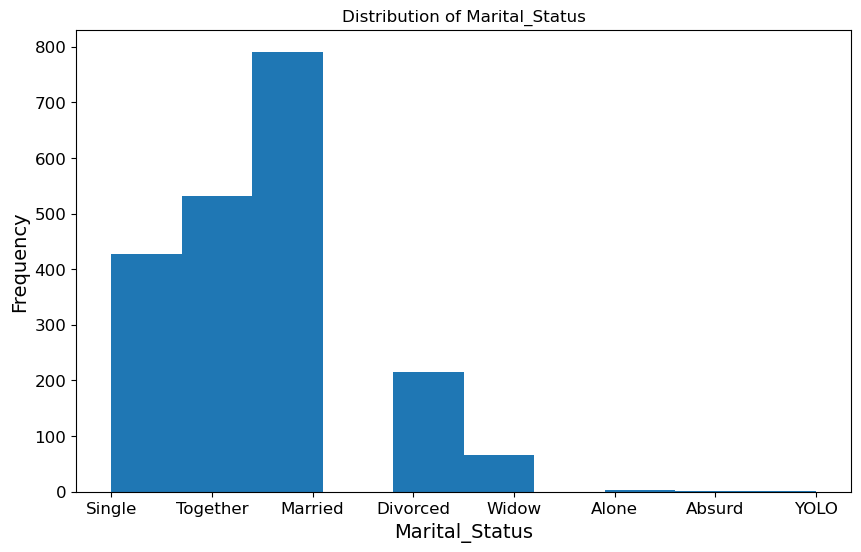

In [99]:
unique_education = customer_normalized['Education'].unique()
print(unique_education)
unique_marital = customer_normalized['Marital_Status'].unique()
print(unique_marital)

# Show the distribution of values in a column
Marital_Status = 'Marital_Status'
plt.figure(figsize=(10, 6))
plt.hist(customer_normalized[Marital_Status], bins=10)
plt.title(f'Distribution of {Marital_Status}')
plt.xlabel(Marital_Status)
plt.ylabel('Frequency')
plt.show()

## Removing outliers

In [27]:
# Drop 'kid_home', 'teen_home' and 'Exist_Complain" columns from customer_clean
customer_clean = customer_clean.drop(['Kid_home', 'Teen_home','Exist_Complain'], axis=1)

## First went for the first and third quartiles (Q1 and Q3) but I removed to many outliers, thus I reduced the percentage
# still using Q1 and Q3 variables though
Q1 = customer_clean.quantile(0.15)
Q3 = customer_clean.quantile(0.85)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and remove them from the DataFrame
customer_outliers = customer_clean[~((customer_clean < lower_bound) | (customer_clean > upper_bound)).any(axis=1)]
# Print the number of outliers removed
print("Number of outliers removed:", len(customer_clean) - len(customer_outliers))


Number of outliers removed: 177


C:\Users\pknuhman\AppData\Local\Temp\ipykernel_30696\2168925729.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  customer_outliers = customer_clean[~((customer_clean < lower_bound) | (customer_clean > upper_bound)).any(axis=1)]


In [30]:
# Add the 'Kid_home', 'Teen_home' and 'Exists_Complain'columns back to the DataFrame
customer_prepared = customer_outliers.join(customer_clean_persistent[['Kid_home', 'Teen_home','Exist_Complain']])
customer_prepared.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Registration_date,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kid_home,Teen_home,Exist_Complain
0,1957,Graduation,Single,58138.0,04.09.2020,58,635,88,546,172,88,88,3,8,10,4,0,0,0
1,1954,Graduation,Single,46344.0,08.03.2022,38,11,1,6,2,1,6,2,1,1,2,1,1,0
2,1965,Graduation,Together,71613.0,21.08.2021,26,426,49,127,111,21,42,1,8,2,10,0,0,0
3,1984,Graduation,Together,26646.0,10.02.2022,26,11,4,20,10,3,5,2,2,0,4,1,0,0
4,1981,PhD,Married,58293.0,19.01.2022,94,173,43,118,46,27,15,5,5,3,6,1,0,0


In [31]:
customer_prepared.describe()

,Year_Birth,Estimated_Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kid_home,Teen_home,Exist_Complain
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,1968.975969,50118.747916,49.301618,290.771947,21.598823,147.290829,31.676312,21.931829,39.234429,2.255517,3.967631,2.427170,5.659147,0.462972,0.514958,0.009809
std,11.674390,20110.013311,28.852230,337.060471,31.844444,202.229895,46.541467,32.442684,45.350256,1.579101,2.616460,2.641383,3.193168,0.542119,0.543177,0.098576
min,1940.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,34363.500000,24.000000,22.000000,1.000000,14.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
50%,1970.000000,49154.000000,50.000000,154.000000,7.000000,57.000000,11.000000,7.000000,22.000000,2.000000,3.000000,1.000000,5.000000,0.000000,0.000000,0.000000
75%,1977.500000,65995.500000,74.000000,479.000000,27.000000,198.000000,39.000000,28.000000,50.000000,3.000000,6.000000,4.000000,8.000000,1.000000,1.000000,0.000000
max,1996.000000,101970.000000,99.000000,1493.000000,152.000000,968.000000,225.000000,152.000000,219.000000,8.000000,11.000000,11.000000,13.000000,2.000000,2.000000,1.000000


## 1.2 Feature selection

Select features that are likely to be good predictors of customer behavior, such as demographics, purchase history, and customer engagement. Drop irrelevant columns

### Useful features

1. Demographic variables (can be useful for segmenting customers based on their demographics and socio-economic status):
 1. Year_of_Birth
 1. Education
 1. Marital_Status
 1. Estimated_Income

1. Purchase history variables (can be useful for segmenting customers based on their purchase behavior and preferences):
 1. MntWines
 1. MntFruits
 1. MntMeatProducts
 1. MntFishProducts
 1. MntSweetProducts
 1. MntGoldProds 

1. Engagement variables (can be useful for segmenting customers based on their level of engagement with the retailer and their purchase channel):
 1. Registration_date
 1. Recency
 1. Exist_Complain
 1. No._WebPurchases
 1. No._CatalogPurchases
 1. No._StorePurchases 

1. Household variables (can be useful for segmenting customers based on their household composition):  
 1. Kids_home
 1. Teen_home 

### irrelevant features to drop
1. Registration date
1. NumDealsPurchases (due to question in forum, column shouldnt be in the dataset)

In [76]:
customer_prepared.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Registration_date,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kid_home,Teen_home,Exist_Complain
0,1957,Graduation,Single,58138.0,04.09.2020,58,635,88,546,172,88,88,3,8,10,4,0,0,0
1,1954,Graduation,Single,46344.0,08.03.2022,38,11,1,6,2,1,6,2,1,1,2,1,1,0
2,1965,Graduation,Together,71613.0,21.08.2021,26,426,49,127,111,21,42,1,8,2,10,0,0,0
3,1984,Graduation,Together,26646.0,10.02.2022,26,11,4,20,10,3,5,2,2,0,4,1,0,0
4,1981,PhD,Married,58293.0,19.01.2022,94,173,43,118,46,27,15,5,5,3,6,1,0,0


In [77]:
customer_selected = customer_prepared.drop(['Registration_date','NumDealsPurchases'], axis=1)
customer_selected.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kid_home,Teen_home,Exist_Complain
0,1957,Graduation,Single,58138.0,58,635,88,546,172,88,88,8,10,4,0,0,0
1,1954,Graduation,Single,46344.0,38,11,1,6,2,1,6,1,1,2,1,1,0
2,1965,Graduation,Together,71613.0,26,426,49,127,111,21,42,8,2,10,0,0,0
3,1984,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,0,4,1,0,0
4,1981,PhD,Married,58293.0,94,173,43,118,46,27,15,5,3,6,1,0,0


## 1.3 Feature Engineering

1. Age: The Year_of_Birth variable can be used to create a new variable for age, which may be a more relevant variable for segmentation.

1. Total Revenue: Instead of analyzing each category of revenue (e.g. wine, meat, fish), a new variable can be created that represents the total amount spent by each customer across all categories.

1. Total Purchases: Instead of analyzing each number of purchases made on a different channel (e.g. Web, catalog, store), a new variable can be created that represents the total number of purchases by each customer across all channels.

1. Channel Engagement: A new variable can be created that represents the total number of purchases made by each customer across all channels (web, catalog, store). Additionally, the proportion of purchases made through each channel can be calculated.

1. Children: A new variable can be created to represent the total number of children (Kids_home + Teen_home) in each household.

1. Complaint History: The Exist_Complain variable can be used to create a new variable that represents the number of complaints filed by each customer in the last year.


1. Spending Behavior: The ratio of spending on each category (e.g., wine, meat, fish) to the total spending can be calculated to identify customers with different spending behaviors.


In [78]:
customer_selected.head()

,Year_Birth,Education,Marital_Status,Estimated_Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Kid_home,Teen_home,Exist_Complain
0,1957,Graduation,Single,58138.0,58,635,88,546,172,88,88,8,10,4,0,0,0
1,1954,Graduation,Single,46344.0,38,11,1,6,2,1,6,1,1,2,1,1,0
2,1965,Graduation,Together,71613.0,26,426,49,127,111,21,42,8,2,10,0,0,0
3,1984,Graduation,Together,26646.0,26,11,4,20,10,3,5,2,0,4,1,0,0
4,1981,PhD,Married,58293.0,94,173,43,118,46,27,15,5,3,6,1,0,0


In [79]:
# Feature engineering for age
customer_selected['Age'] = 2023 - customer_selected['Year_Birth']

# Feature engineering for total revenue
customer_selected['TotalRevenue'] = customer_selected['MntWines'] + customer_selected['MntFruits'] + customer_selected['MntMeatProducts'] + customer_selected['MntFishProducts'] + customer_selected['MntSweetProducts'] + customer_selected['MntGoldProds']

# Feature engineering for total purchases
customer_selected['TotalPurchases'] = customer_selected['NumWebPurchases'] + customer_selected['NumCatalogPurchases'] + customer_selected['NumStorePurchases']


# Feature engineering for channel engagement
customer_selected['WebEngagement'] = customer_selected['NumWebPurchases'] / customer_selected['TotalPurchases']
customer_selected['CatalogEngagement'] = customer_selected['NumCatalogPurchases'] / customer_selected['TotalPurchases']
customer_selected['StoreEngagement'] = customer_selected['NumStorePurchases'] / customer_selected['TotalPurchases']

# Feature engineering for household composition
customer_selected['TotalChildren'] = customer_selected['Kid_home'] + customer_selected['Teen_home']

# Feature engineering for complaint history
customer_selected['ComplaintsLastYear'] = customer_selected['Exist_Complain']

# Feature engineering for purchase recency and frequency
##customer_selected['PurchaseRecency'] = customer_selected['Recency']
##customer_selected['PurchaseFrequency'] = customer_selected['NumWebPurchases'] + customer_selected['NumCatalogPurchases'] + customer_selected['NumStorePurchases']

# Feature engineering for spending behavior
customer_selected['WineRatio'] = customer_selected['MntWines'] / customer_selected['TotalRevenue']
customer_selected['MeatRatio'] = customer_selected['MntMeatProducts'] / customer_selected['TotalRevenue']
customer_selected['FishRatio'] = customer_selected['MntFishProducts'] / customer_selected['TotalRevenue']

# Remove the original variables that have been transformed or are no longer needed
customer_selected = customer_selected.drop(['Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Kid_home', 'Teen_home', 'Exist_Complain'], axis=1)

customer_selected.head()


,Education,Marital_Status,Estimated_Income,Recency,Age,TotalRevenue,TotalPurchases,WebEngagement,CatalogEngagement,StoreEngagement,TotalChildren,ComplaintsLastYear,WineRatio,MeatRatio,FishRatio
0,Graduation,Single,58138.0,58,66,1617,22,0.363636,0.454545,0.181818,0,0,0.392703,0.337662,0.106370
1,Graduation,Single,46344.0,38,69,27,4,0.250000,0.250000,0.500000,2,0,0.407407,0.222222,0.074074
2,Graduation,Together,71613.0,26,58,776,20,0.400000,0.100000,0.500000,0,0,0.548969,0.163660,0.143041
3,Graduation,Together,26646.0,26,39,53,6,0.333333,0.000000,0.666667,1,0,0.207547,0.377358,0.188679
4,PhD,Married,58293.0,94,42,422,14,0.357143,0.214286,0.428571,1,0,0.409953,0.279621,0.109005


In [80]:
customer_selected.describe()

,Estimated_Income,Recency,Age,TotalRevenue,TotalPurchases,WebEngagement,CatalogEngagement,StoreEngagement,TotalChildren,ComplaintsLastYear,WineRatio,MeatRatio,FishRatio
count,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000,2037.000000,2037.000000,2037.000000,2039.000000,2039.000000,2039.000000,2039.000000,2039.000000
mean,50118.747916,49.301618,54.024031,552.504169,12.053948,0.332509,0.154621,0.512869,0.977930,0.009809,0.465485,0.245407,0.070377
std,20110.013311,28.852230,11.674390,576.350612,7.092203,0.117620,0.131549,0.146810,0.737342,0.098576,0.231034,0.121105,0.078805
min,3502.000000,0.000000,27.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34363.500000,24.000000,45.500000,64.000000,6.000000,0.250000,0.000000,0.416667,0.000000,0.000000,0.294118,0.153846,0.012346
50%,49154.000000,50.000000,53.000000,312.000000,11.000000,0.333333,0.142857,0.500000,1.000000,0.000000,0.471014,0.229614,0.046512
75%,65995.500000,74.000000,63.000000,964.500000,18.000000,0.407407,0.250000,0.600000,1.000000,0.000000,0.648018,0.324388,0.100000
max,101970.000000,99.000000,83.000000,2525.000000,32.000000,1.000000,0.647059,1.000000,3.000000,1.000000,0.963303,0.749084,0.590909


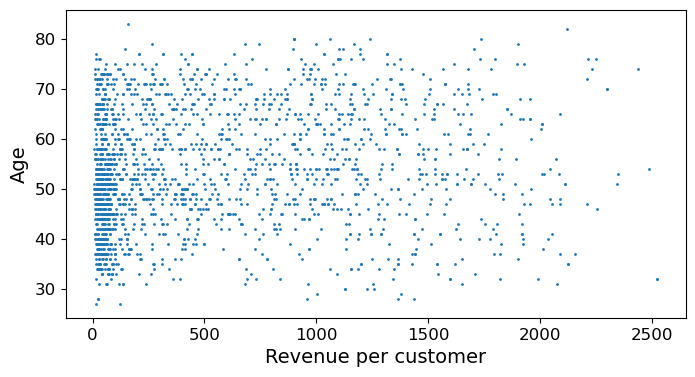

In [81]:
plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["Age"], s=1) #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.show()

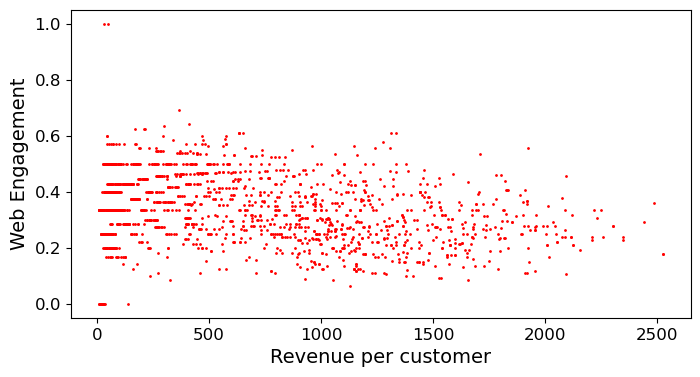

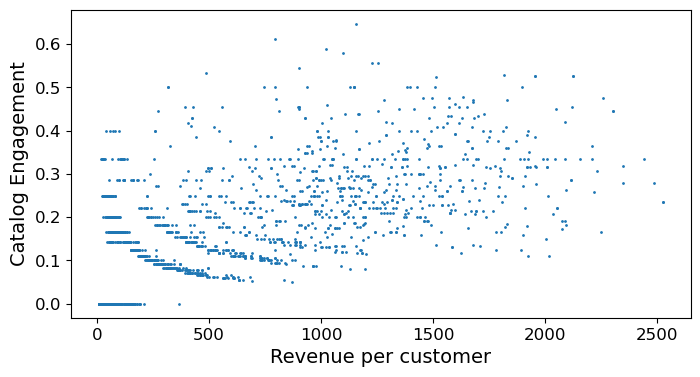

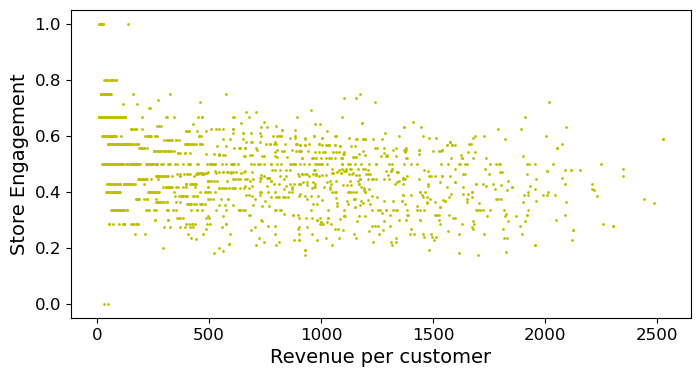

In [82]:
plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["WebEngagement"], s=1,color='r') #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Web Engagement", fontsize=14)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["CatalogEngagement"], s=1) #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Catalog Engagement", fontsize=14)
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(x=customer_selected["TotalRevenue"],y=customer_selected["StoreEngagement"], s=1,color='y') #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Store Engagement", fontsize=14)
plt.show()

## 1.4 Normalization
Since the variables used in clustering analysis can have different scales, it is important to normalize the variables. You can use Min-Max normalization, Standardization or log transformation depending on the distribution of the data.

In [84]:
# Persist the dataset customer_selected for later use
customer_selected_persistent = customer_selected
customer_selected_persistent.head()

,Education,Marital_Status,Estimated_Income,Recency,Age,TotalRevenue,TotalPurchases,WebEngagement,CatalogEngagement,StoreEngagement,TotalChildren,ComplaintsLastYear,WineRatio,MeatRatio,FishRatio
0,Graduation,Single,58138.0,58,66,1617,22,0.363636,0.454545,0.181818,0,0,0.392703,0.337662,0.106370
1,Graduation,Single,46344.0,38,69,27,4,0.250000,0.250000,0.500000,2,0,0.407407,0.222222,0.074074
2,Graduation,Together,71613.0,26,58,776,20,0.400000,0.100000,0.500000,0,0,0.548969,0.163660,0.143041
3,Graduation,Together,26646.0,26,39,53,6,0.333333,0.000000,0.666667,1,0,0.207547,0.377358,0.188679
4,PhD,Married,58293.0,94,42,422,14,0.357143,0.214286,0.428571,1,0,0.409953,0.279621,0.109005


In [86]:
# Define the numeric columns to be normalized
numeric_columns = ['Estimated_Income', 'Recency', 'Age', 'TotalRevenue', 'TotalPurchases',
                   'WebEngagement', 'CatalogEngagement', 'StoreEngagement', 'TotalChildren',
                   'ComplaintsLastYear', 'WineRatio', 'MeatRatio', 'FishRatio']

# Create a StandardScaler object and apply it to the numeric columns
scaler = StandardScaler()
##customer_selected[numeric_columns] = scaler.fit_transform(customer_selected[numeric_columns])
customer_normalized = customer_selected
customer_normalized[numeric_columns] = scaler.fit_transform(customer_normalized[numeric_columns])

# Print the first few rows of the normalized DataFrame to ensure everything looks correct
customer_normalized.head()


,Education,Marital_Status,Estimated_Income,Recency,Age,TotalRevenue,TotalPurchases,WebEngagement,CatalogEngagement,StoreEngagement,TotalChildren,ComplaintsLastYear,WineRatio,MeatRatio,FishRatio
0,Graduation,Single,0.398867,0.301554,1.026084,1.847412,1.402736,0.264707,2.280505,-2.255524,-1.326616,-0.099528,-0.315107,0.761971,0.456844
1,Graduation,Single,-0.187751,-0.391803,1.283120,-0.912002,-1.135885,-0.701664,0.725222,-0.087682,1.386494,-0.099528,-0.251443,-0.191489,0.046925
2,Graduation,Together,1.069096,-0.807817,0.340655,0.387873,1.120667,0.573945,-0.415318,-0.087682,-1.326616,-0.099528,0.361437,-0.675176,0.922301
3,Graduation,Together,-1.167503,-0.807817,-1.287238,-0.866880,-0.853816,0.007008,-1.175679,1.047854,0.029939,-0.099528,-1.116723,1.089835,1.501569
4,PhD,Married,0.406576,1.549598,-1.030202,-0.226487,0.274460,0.209485,0.453665,-0.574341,0.029939,-0.099528,-0.240424,0.282586,0.490288


### converting education and marital_status to dummy variables

In [88]:
# Convert 'Education' and 'Marital_Status' columns to dummy variables
customer_dummies = pd.get_dummies(customer_normalized, columns=['Education', 'Marital_Status'])
customer_dummies.head()


,Estimated_Income,Recency,Age,TotalRevenue,TotalPurchases,WebEngagement,CatalogEngagement,StoreEngagement,TotalChildren,ComplaintsLastYear,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.398867,0.301554,1.026084,1.847412,1.402736,0.264707,2.280505,-2.255524,-1.326616,-0.099528,...,0,0,0,0,0,0,1,0,0,0
1,-0.187751,-0.391803,1.283120,-0.912002,-1.135885,-0.701664,0.725222,-0.087682,1.386494,-0.099528,...,0,0,0,0,0,0,1,0,0,0
2,1.069096,-0.807817,0.340655,0.387873,1.120667,0.573945,-0.415318,-0.087682,-1.326616,-0.099528,...,0,0,0,0,0,0,0,1,0,0
3,-1.167503,-0.807817,-1.287238,-0.866880,-0.853816,0.007008,-1.175679,1.047854,0.029939,-0.099528,...,0,0,0,0,0,0,0,1,0,0
4,0.406576,1.549598,-1.030202,-0.226487,0.274460,0.209485,0.453665,-0.574341,0.029939,-0.099528,...,0,1,0,0,0,1,0,0,0,0


## 1.5 Clustering k-means

In [ ]:
# Your data
data = customer_clean

# Create a DataFrame
customer = pd.DataFrame(data, columns=["Year_Birth", "Education", "Marital_Status", "Estimated_Income", "Kid_home", "Teen_home", "Registration_date", "Recency", "Exist_Complain", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"])

# Preprocess the data

# Convert the Registration_date column to datetime
customer['Registration_date'] = pd.to_datetime(customer['Registration_date'], format="%d.%m.%Y")

# Calculate days since registration
customer['Days_since_registration'] = (pd.Timestamp.now() - customer['Registration_date']).dt.days

# Drop the Registration_date column
customer = customer.drop('Registration_date', axis=1)

# Scale numerical features
numerical_features = customer.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
customer[numerical_features] = scaler.fit_transform(customer[numerical_features])

# Encode categorical features
categorical_features = customer.select_dtypes(include=[object]).columns
encoder = LabelEncoder()
for feature in categorical_features:
    customer[feature] = encoder.fit_transform(customer[feature])

# Choose the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Choose the optimal number of clusters based on the plot (e.g., 3)
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(customer)

# Add the cluster labels to the original DataFrame
customer['Cluster'] = clusters

# Analyze and visualize the clustering results
print(customer.groupby('Cluster').mean())


Let's visuzalize the data

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(x=customer["Revenue"],y=customer["Time spend in app"], s=1) #make marker size smaller
plt.xlabel("Revenue per customer", fontsize=14)
plt.ylabel("Time spend in app", fontsize=14)
save_fig("scatterplot_customers")
plt.show()

## Performing k-means clustering

**Fit and predict**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42) # set random_state for reproducablity
y_pred = kmeans.fit_predict(customer)

Each instance was assigned to one of the 5 clusters:

In [ ]:
y_pred

In [ ]:
y_pred is kmeans.labels_

And the following 5 _centroids_ (i.e., cluster centers) were estimated:

In [ ]:
kmeans.cluster_centers_

In [ ]:
kmeans.labels_

Plot cluster results

### Decision Boundaries

Let's plot the model's decision boundaries. This gives us a _Voronoi diagram_:

In [ ]:
def plot_data(customer):
    plt.plot(customer["Revenue"], customer["Time spend in app"], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = customer.min(axis=0) - 0.1
    maxs = customer.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Accent")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(customer)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("Revenue per customer", fontsize=14) 
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Time spend in app", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, customer)
save_fig("voronoi_plot")
plt.show()

Not bad! Some of the instances near the edges were probably assigned to the wrong cluster, but overall it looks pretty good.

### Hard Clustering _vs_ Soft Clustering

In [ ]:
temp =pd.concat([pd.DataFrame(customer),pd.DataFrame(kmeans.labels_, columns=['Cluster'])], axis=1)
temp

In [ ]:
import seaborn as sns
diverging_colors = sns.color_palette("Blues")

sns.pairplot(x_vars=['Revenue'], y_vars=['Time spend in app'], data=temp, hue="Cluster", height=5, palette=sns.color_palette('tab10', n_colors=5))


Of course, we can predict the labels of new instances:

In [ ]:
Customer_new = np.array([[0, 2], [-0.5, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(Customer_new)

Rather than arbitrarily choosing the closest cluster for each instance, which is called _hard clustering_, it might be better measure the distance of each instance to all 5 centroids. This is what the `transform()` method does:

In [ ]:
kmeans.transform(Customer_new)

### K-Means Variability

In the original K-Means algorithm, the centroids are just initialized randomly, and the algorithm simply runs a single iteration to gradually improve the centroids, as we saw above.

However, one major problem with this approach is that if you run K-Means multiple times (or with different random seeds), it can converge to very different solutions, as you can see below:

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, customer, title1=None, title2=None):
    clusterer1.fit(customer)
    clusterer2.fit(customer)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, customer)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, customer, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=3)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, customer,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the _inertia_ metric:

So one approach to solve the variability issue is to simply run the K-Means algorithm multiple times with different random initializations, and select the solution that minimizes the inertia. For example, here are the inertias of the two "bad" models shown in the previous figure and thinertias of the "good" model we chose above:

In [ ]:
kmeans_rnd_init1.inertia_

In [ ]:
kmeans_rnd_init2.inertia_

In [ ]:
kmeans.inertia_

# Finding the right number of clusters

## Heatmap

In [ ]:
kmeans.cluster_centers_

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(kmeans.cluster_centers_)

scaledClusterCenteres = scaler.transform(kmeans.cluster_centers_)
scaledClusterCenteres

In [ ]:
import seaborn as sns
x_labels = ["Revenue per customer","Time spend in app"]
y_labels = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3", "Cluster 4"]
sns.heatmap(scaledClusterCenteres, fmt='.2f', cmap='RdYlGn', xticklabels=x_labels, yticklabels=y_labels)

## Elbow plot

No, we cannot simply take the value of $k$ that minimizes the inertia, since it keeps getting lower as we increase $k$. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of $k$ and analyze the resulting curve:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(customer) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(customer, kmeans.labels_)

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(customer)for k in range(1, 10)]
silhouette_scores = [silhouette_score(customer, model.labels_) for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

## Silhouette diagram

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(customer)for k in range(1, 10)]

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(customer, y_pred)

    padding = len(customer) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()